In [1]:
# To import various libraries

import math
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

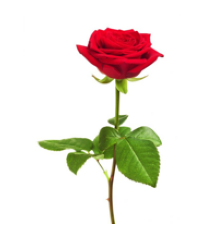

In [2]:
# To open image flower.png

rose = Image.open('flower.png')
plt.imshow(rose)
plt.axis('off')
plt.show()

In [3]:
# Array data related to image flower.png

rose_array = np.array(rose)
A,B,C=rose_array.shape
print(f"Shape of the image array is : {A} , {B} , {C}  \n")

Shape of the image array is : 200 , 175 , 3  



In [4]:
# Given Initial Cluster Means

C1_initial = np.array([255,0,0])
C2_initial = np.array([0,0,0])
C3_initial = np.array([255,255,255])

In [5]:
# K-mean clustering algorithm
# 5 number of iterations

for Q in range(0,5):

    C1=[]
    C2=[]
    C3=[]
    
    C1index=[]
    C2index=[]
    C3index=[]
    

    sse=0
    
    for i in range (0,A):
        for j in range (0,B):

            s1,s2,s3=0,0,0
            
            for k in range (0,3):
                s1 = s1 + ((rose_array[i,j][k]-C1_initial[k])**2)

            for k in range (0,3):    
                s2 = s2 + ((rose_array[i,j][k]-C2_initial[k])**2)

            for k in range (0,3):
                s3 = s3 + ((rose_array[i,j][k]-C3_initial[k])**2)

            mini = min(s1,s2,s3)

            if mini==s1:
                C1.append(rose_array[i,j])
                C1index.append([i,j])
                sse=sse+s1

            elif mini==s2:
                C2.append(rose_array[i,j])
                C2index.append([i,j])
                sse=sse+s2

            elif mini==s3:
                C3.append(rose_array[i,j])
                C3index.append([i,j])
                sse=sse+s3

    print(f"Sum Square Error for iteration {Q} = ",sse)
    print("length of C1 = ",len(C1))
    print("length of C2 = ",len(C2))
    print("length of C3 = ",len(C3))

    # FOR CLASS 1
    sx,sy,sz = 0,0,0
    for i in range(0,len(C1)):
        sx = sx + C1[i][0]
        sy = sy + C1[i][1]
        sz = sz + C1[i][2]
    X1=round(sx/len(C1))
    Y1=round(sy/len(C1))
    Z1=round(sz/len(C1))
    CLASS1=np.array([X1,Y1,Z1])
    print("CENTROID for CLASS 1 : ",CLASS1)

    # FOR CLASS 2
    sx,sy,sz = 0,0,0
    for i in range(0,len(C2)):
        sx = sx + C2[i][0]
        sy = sy + C2[i][1]
        sz = sz + C2[i][2]
    X2=round(sx/len(C2))
    Y2=round(sy/len(C2))
    Z2=round(sz/len(C2))
    CLASS2=np.array([X2,Y2,Z2])
    print("CENTROID for CLASS 2 : ",CLASS2)

    # FOR CLASS 3
    sx,sy,sz = 0,0,0
    for i in range(0,len(C3)):
        sx = sx + C3[i][0]
        sy = sy + C3[i][1]
        sz = sz + C3[i][2]
    X3=round(sx/len(C3))
    Y3=round(sy/len(C3))
    Z3=round(sz/len(C3))
    CLASS3=np.array([X3,Y3,Z3])
    print("CENTROID for CLASS 3 : ",CLASS3)


    C1_initial = CLASS1
    C2_initial = CLASS2
    C3_initial = CLASS3
    print("\n\n")

Sum Square Error for iteration 0 =  135915038
length of C1 =  2471
length of C2 =  3318
length of C3 =  29211
CENTROID for CLASS 1 :  [192  29  42]
CENTROID for CLASS 2 :  [ 93 120  31]
CENTROID for CLASS 3 :  [253 253 251]



Sum Square Error for iteration 1 =  23825009
length of C1 =  2405
length of C2 =  3851
length of C3 =  28744
CENTROID for CLASS 1 :  [191  10  38]
CENTROID for CLASS 2 :  [104 137  42]
CENTROID for CLASS 3 :  [254 254 253]



Sum Square Error for iteration 2 =  20269838
length of C1 =  2382
length of C2 =  3914
length of C3 =  28704
CENTROID for CLASS 1 :  [190   9  37]
CENTROID for CLASS 2 :  [106 138  44]
CENTROID for CLASS 3 :  [254 254 254]



Sum Square Error for iteration 3 =  20209612
length of C1 =  2378
length of C2 =  3932
length of C3 =  28690
CENTROID for CLASS 1 :  [190   9  37]
CENTROID for CLASS 2 :  [106 138  44]
CENTROID for CLASS 3 :  [254 254 254]



Sum Square Error for iteration 4 =  20209612
length of C1 =  2378
length of C2 =  3932
length o

In [6]:
# Replacing each pixel in the input image with the cluster center it belongs to.

new_rose = np.zeros((A,B,C))
for i in range(0,A):
    for j in range(0,B):
        if [i,j] in C1index:
            new_rose[i,j]=CLASS1
            
        elif [i,j] in C2index:
            new_rose[i,j]=CLASS2
        
        elif [i,j] in C3index:
            new_rose[i,j]=CLASS3

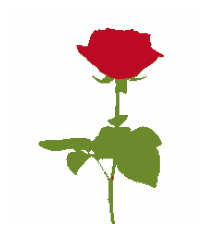

In [7]:
# To display the resulting image

plt.imshow(new_rose.astype('uint8'))
plt.axis('off')
plt.show()